## Introduction
## New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2018, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States.

## This final project explores the best locations for Lebanese restaurants throughout the city of New York. As New York is the most diverse city in the world (800 languages are spoken in New York), it has a long tradition of different ethnical restaurants. Now when the idea of a healthy lifestyle conquered the minds of people all over the country, Lebanese restaurants became extremely popular, as they offer a healthy alternative to regular American eating habits. That's why Potentially the owner of the new East European restaurant can have great success and consistent profit. However, as with any business, opening a new restaurant requires serious considerations and is more complicated than it seems from the first glance. In particular, the location of the restaurant is one of the most important factors that will affect whether it will have success or a failure. So our project will attempt to answer the questions “Where should the investor open a Lebanese Restaurant?” and “Where should I go If I want great Lebanese food?”

## Data
### In order to answer the above questions, data on New York City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

### New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

### All data related to locations and quality of restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

## Methodology
#### • Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

#### • FourSquare be used to locate all venues and then filtered by Lebanese restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

#### • Data will be sorted based on rankings.

#### • Finally, the data be will be visually assessed using graphing from Python libraries.

## Problem Statement
#### What is / are the best location(s) for Lebanese cuisine in New York City?
#### In what Neighborhood and/or borough should the investor open a Lebanese restaurant to have the best chance of being successful?
#### Where would I go in New York City to have the best Lebanese food?
#### Before we get the data and start exploring it, let's import all required libraries .

In [36]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!pip install folium 
import folium # map rendering library

In [37]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Libraries imported.


### My variables

In [38]:
# Define Foursquare Credentials and Version

CLIENT_ID = '4DYDPVUI0RRWXCIZDAAYLAJHQYUQ2GAIOXCFGDSRP02GL50W' # your Foursquare ID
CLIENT_SECRET = 'HJQUVFBQIR2KTPWRGU3KJT4QGNWR5YST3AVXZF0YLGDKR10U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Now let's define the functions we are going to use later in this project

In [39]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

## Now let's use the above codes to get our initial NYC data

In [40]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [41]:
ny_data.shape


(306, 4)

### Initial Data Analysis

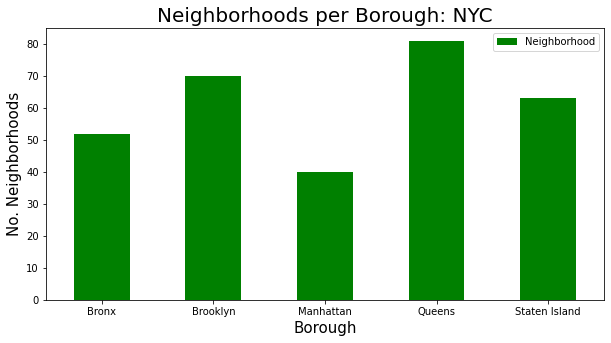

In [42]:
clr = "green"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

#### Let's analyze further and see how many Lebanese restaurants there are in each neighborhood and borough. After it, graph the results.

In [43]:
# prepare neighborhood list that contains lebanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
lebanese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    lebanese_restaurants=venues[venues['Category']=='Lebanese Restaurant']   
    print('(',count,'/',len(ny_data),')','Lebanese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(lebanese_restaurants)))
    print(row)
    for resturant_detail in lebanese_restaurants.values.tolist():
        id, name , category=resturant_detail
        lebanese_rest_ny = lebanese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Lebanese Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Lebanese Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Lebanese Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Lebanese Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Lebanese Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Lebanese Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Lebanese Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Lebanese Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Lebanese Restaurants in Norwood, B

In [44]:
#lebanese_rest_ny.to_csv('lebanese_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
lebanese_rest_ny.to_csv('lebanese_rest_ny_tocsv1.csv')

In [45]:

lebanese_ny = pd.read_csv('lebanese_rest_ny_tocsv1.csv')
lebanese_rest_ny.tail()

,Borough,Neighborhood,ID,Name
0,Manhattan,Greenwich Village,550af1d0498e5c0bd04229e6,Manousheh
1,Manhattan,Sutton Place,4b3f9936f964a52000aa25e3,Naya Mezze & Grill


In [46]:
lebanese_rest_ny.shape

(2, 4)

### Plot the data for readability

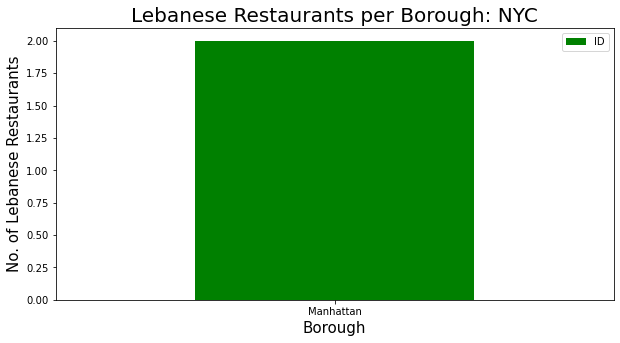

In [47]:

lebanese_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Lebanese Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Lebanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

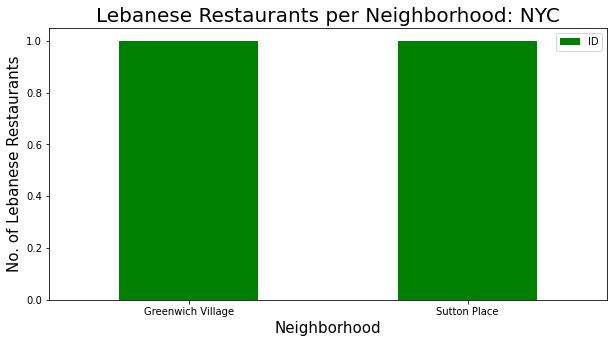

In [48]:

NOofNeigh = 6 # top number for graphing all the same past 6
lebanese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Lebanese Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Lebanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [50]:
lebanese_rest_ny[lebanese_rest_ny['Neighborhood']=='Greenwich Village']
lebanese_rest_ny[lebanese_rest_ny['Neighborhood']=='Sutton Place']
print(lebanese_rest_ny)

     Borough       Neighborhood                        ID                Name
0  Manhattan  Greenwich Village  550af1d0498e5c0bd04229e6           Manousheh
1  Manhattan       Sutton Place  4b3f9936f964a52000aa25e3  Naya Mezze & Grill


### Now we will get the ranking of each restaurant for further analysis.

In [51]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
lebanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in lebanese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(lebanese_rest_ny),')','processed')
    lebanese_rest_stats_ny = lebanese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
lebanese_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5ff0cfc1732a472e70ab991e'}, 'response': {'venue': {'id': '550af1d0498e5c0bd04229e6', 'name': 'Manousheh', 'contact': {'phone': '3479715778', 'formattedPhone': '(347) 971-5778', 'twitter': 'manoushehnyc', 'facebook': '1379440182285854', 'facebookUsername': 'ManoushehNYC', 'facebookName': 'Manousheh NYC'}, 'location': {'address': '193 Bleecker St', 'crossStreet': 'btwn MacDougal & Minetta St', 'lat': 40.72937268195377, 'lng': -74.00135010480881, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72937268195377, 'lng': -74.00135010480881}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['193 Bleecker St (btwn MacDougal & Minetta St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/manousheh/550af1d0498e5c0bd04229e6', 'categories': [{'id': '58daa1558bbb0b01f18ec1cd', 'name': 'Lebanese Restaurant', 'pluralName': 'Lebanese Restaurants', 'shortName': 

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Manhattan,Greenwich Village,550af1d0498e5c0bd04229e6,Manousheh,263,8.9,66
1,Manhattan,Sutton Place,4b3f9936f964a52000aa25e3,Naya Mezze & Grill,107,7.6,57


In [52]:
lebanese_rest_stats_ny.to_csv('lebanese_rest_stats_ny_csv.csv') # As I move through this project I continue to save data to a .csv file

In [53]:
lebanese_rest_stats_ny.shape


(2, 7)

In [54]:
lebanese_rest_stats_ny.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       2 non-null      object 
 1   Neighborhood  2 non-null      object 
 2   ID            2 non-null      object 
 3   Name          2 non-null      object 
 4   Likes         2 non-null      object 
 5   Rating        2 non-null      float64
 6   Tips          2 non-null      object 
dtypes: float64(1), object(6)
memory usage: 240.0+ bytes


In [55]:
#We see that the values like Likes, Tips are string values. We would need to convert them into float for further analysis

lebanese_rest_stats_ny['Likes'] = lebanese_rest_stats_ny['Likes'].astype('float64')
lebanese_rest_stats_ny['Tips'] = lebanese_rest_stats_ny['Tips'].astype('float64')
lebanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       2 non-null      object 
 1   Neighborhood  2 non-null      object 
 2   ID            2 non-null      object 
 3   Name          2 non-null      object 
 4   Likes         2 non-null      float64
 5   Rating        2 non-null      float64
 6   Tips          2 non-null      float64
dtypes: float64(3), object(4)
memory usage: 240.0+ bytes


### Now when the data types look correct, let's continue our analysis.


In [56]:
lebanese_rest_stats_ny.describe()


,Likes,Rating,Tips
count,2.000000,2.000000,2.000000
mean,185.000000,8.250000,61.500000
std,110.308658,0.919239,6.363961
min,107.000000,7.600000,57.000000
25%,146.000000,7.925000,59.250000
50%,185.000000,8.250000,61.500000
75%,224.000000,8.575000,63.750000
max,263.000000,8.900000,66.000000


In [57]:
# Resturant with maximum Likes
lebanese_rest_stats_ny.iloc[lebanese_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              550af1d0498e5c0bd04229e6
Name                           Manousheh
Likes                                263
Rating                               8.9
Tips                                  66
Name: 0, dtype: object

In [58]:
# Resturant with maximum Ratings
lebanese_rest_stats_ny.iloc[lebanese_rest_stats_ny['Rating'].idxmax()]


Borough                        Manhattan
Neighborhood           Greenwich Village
ID              550af1d0498e5c0bd04229e6
Name                           Manousheh
Likes                                263
Rating                               8.9
Tips                                  66
Name: 0, dtype: object

In [59]:
# Resturant with maximum Tips
lebanese_rest_stats_ny.iloc[lebanese_rest_stats_ny['Tips'].idxmax()]


Borough                        Manhattan
Neighborhood           Greenwich Village
ID              550af1d0498e5c0bd04229e6
Name                           Manousheh
Likes                                263
Rating                               8.9
Tips                                  66
Name: 0, dtype: object

## Now let's identify and visualize neighborhood with the maximum average rating of restaurants

In [60]:
ny_neighborhood_stats=lebanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
0,Greenwich Village,8.9
1,Sutton Place,7.6


### Above are the top neighborhoods with the highest average ratings of Lebanese restaurants.

In [61]:
ny_borough_stats=lebanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Manhattan,8.25


## Let's visualize the results

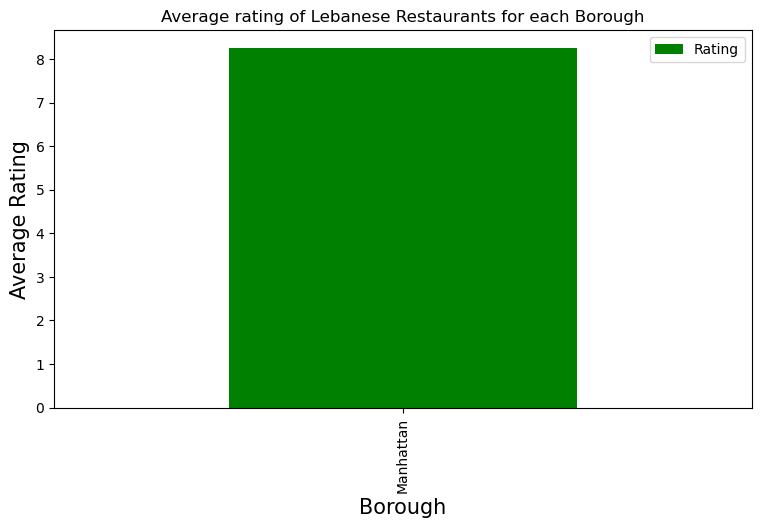

In [62]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Lebanese Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
lebanese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

In [63]:
#We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Greenwich Village,8.9


In [64]:
#We will join this Dataset to original New York data to get longitude and latitude

ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Greenwich Village,40.726933,-73.999914,8.9


In [65]:
#Now we will show this data on a map

# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

## Adding Labelling

In [66]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

## Results / Conclusion
#### Manhattan has the best rated Lebanese restaurants on average. Staten Island and The Bronx have the least amount of Lebanese restaurants per borough. However, of note, Greenwich Village and Sutton Place in Manhattan has the highest number of Lebanese Restaurants in all of NY. Despite Manhattan having the least number of neighborhoods in all  boroughs, it has the most number of Lebanese restaurants. Based on the above information, I would state that Manhattan is the best locations for Lebanese cuisine in NYC. To have the best shot of success, I would open a Lebanese restaurant in and around Manhattan. Manhattan has multiple neighborhoods with average ratings exceeding 8.0 on a scale of 1.0 to 10.0 and has less amount of Labanese restaurants than The Bronx, making competition easier. Also we should keep in mind, that real estate prices in Manhattan are much cheaper than in Bronx. As a final note, all of the above analysis is depended on the accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.